# REGLAS DE ASOCIACIÓN

- Extrae los 20 productos que más se venden por si mismos.
- Extrae los 20 productos o conjuntos de dos productos que menos se venden.
- Extrae las reglas de asociación limitando a un máximo de un contjunto de 2 productos.
- Ordena la tabla anterior por el lift y confidence.
- Indica algunas conclusiones que extraigas de lo que has visto.
- Pinta en una gráfica las reglas de asociación extraídas e interpretra la propia gráfica.

### Importamos librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import plotly.graph_objects as go

### Leemos el dataset

In [2]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv')

In [3]:
dataset

shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0             NaN              NaN  NaN            NaN          NaN   
1             NaN              NaN  NaN            NaN          NaN   
2             NaN              NaN  NaN            NaN          NaN   
3       green tea              NaN  NaN            NaN          NaN   
4             NaN              NaN  NaN            NaN          NaN   
...           ...              ...  ...            ...          ...   
7495          NaN              NaN  NaN            NaN          NaN   
7496    magazines        green tea  NaN            NaN          NaN   
7497          NaN              NaN  NaN            NaN          NaN   
7498          NaN              NaN  NaN            NaN          NaN   
7499          NaN              NaN  NaN            NaN          NaN   

     tomato juice low fat yogurt green tea honey salad mineral water salmon  \
0             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
1             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
2             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
3             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
4             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
...           ...            ...       ...   ...   ...           ...    ...   
7495          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7496          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7497          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7498          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7499          NaN            NaN       NaN   NaN   NaN           NaN    NaN   

     antioxydant juice frozen smoothie spinach  olive oil  
0                  NaN             NaN     NaN        NaN  
1                  NaN             NaN     NaN        NaN  
2                  NaN             NaN     NaN        NaN  
3                  NaN             NaN     NaN        NaN  
4                  NaN             NaN     NaN        NaN  
...                ...             ...     ...        ...  
7495               NaN             NaN     NaN        NaN  
7496               NaN             NaN     NaN        NaN  
7497               NaN             NaN     NaN        NaN  
7498               NaN             NaN     NaN        NaN  
7499               NaN             NaN     NaN        NaN  

[7500 rows x 20 columns]

### Convertimos el dataset en una lista de listas, en la que cada lista interna representa una fila del dataset, descartando los NaN

In [4]:
transactions = []
for i in range(0, len(dataset)):
    lista = []
    for name_column in dataset.columns:
        if pd.isna(dataset[name_column][i]) == False:
            lista.append(dataset[name_column][i])
    transactions.append(lista)

In [5]:
transactions

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

### Cargamos la función TransactionEncoder de la librería mlxtend.preprocessing, la cual usaremos para convertir nuestra lista anterior en un dataframe en el que las columnas son el nombre de los productos y el valor pasa a ser True o False según si en esa posición se encontraba ese producto

In [6]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0          False    False              False      False    False        False   
1          False    False              False      False    False        False   
2          False    False              False      False     True        False   
3          False    False              False      False    False        False   
4          False    False              False      False    False        False   
...          ...      ...                ...        ...      ...          ...   
7495       False    False              False      False    False        False   
7496       False    False              False      False    False        False   
7497       False    False              False      False    False        False   
7498       False    False              False      False    False        False   
7499       False    False              False      False    False        False   

      bacon  barbecue sauce  black tea  blueberries  ...  turkey  \
0     False           False      False        False  ...   False   
1     False           False      False        False  ...   False   
2     False           False      False        False  ...    True   
3     False           False      False        False  ...   False   
4     False           False      False        False  ...   False   
...     ...             ...        ...          ...  ...     ...   
7495  False           False      False        False  ...   False   
7496  False           False      False        False  ...   False   
7497  False           False      False        False  ...   False   
7498  False           False      False        False  ...   False   
7499  False           False      False        False  ...   False   

      vegetables mix  water spray  white wine  whole weat flour  \
0              False        False       False             False   
1              False        False       False             False   
2              False        False       False             False   
3              False        False       False             False   
4              False        False       False             False   
...              ...          ...         ...               ...   
7495           False        False       False             False   
7496           False        False       False             False   
7497           False        False       False             False   
7498           False        False       False             False   
7499           False        False       False             False   

      whole wheat pasta  whole wheat rice   yams  yogurt cake  zucchini  
0                 False             False  False        False     False  
1                 False             False  False        False     False  
2                 False             False  False        False     False  
3                 False              True  False        False     False  
4                 False             False  False        False     False  
...                 ...               ...    ...          ...       ...  
7495              False             False  False        False     False  
7496              False             False  False        False     False  
7497              False             False  False        False     False  
7498              False             False  False        False     False  
7499              False             False  False         True     False  

[7500 rows x 120 columns]

### Extrae los 20 productos que más se venden por si mismos.
Vemos ahora el soporte (frecuencia en la que aparecen) de cada uno de los items

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

items_frecuentes = apriori(df, min_support=0.01, use_colnames=True, max_len = 1)
items_frecuentes.sort_values("support", ascending = False)[0:20]

support             itemsets
46  0.238267      (mineral water)
19  0.179733               (eggs)
63  0.174133          (spaghetti)
24  0.170933       (french fries)
13  0.163867          (chocolate)
32  0.132000          (green tea)
45  0.129600               (milk)
33  0.098267        (ground beef)
30  0.095333  (frozen vegetables)
53  0.095067           (pancakes)
6   0.087200            (burgers)
8   0.081067               (cake)
15  0.080400            (cookies)
22  0.079333           (escalope)
41  0.076400     (low fat yogurt)
61  0.071333             (shrimp)
67  0.068400           (tomatoes)
52  0.065733          (olive oil)
29  0.063200    (frozen smoothie)
68  0.062533             (turkey)

### Extrae los 20 productos o conjuntos de dos productos que menos se venden.
Vemos ahora el soporte (frecuencia en la que aparecen) de cada uno de los items

In [8]:
from mlxtend.frequent_patterns import apriori, association_rules

items_frecuentes = apriori(df, min_support=0.01, use_colnames=True, max_len = 2)
items_frecuentes.sort_values("support", ascending = True)[0:20]

support                              itemsets
170  0.010000  (frozen smoothie, frozen vegetables)
164  0.010000                (french fries, shrimp)
177  0.010133   (frozen vegetables, low fat yogurt)
123  0.010133                     (chocolate, soup)
97   0.010267              (mineral water, cereals)
234  0.010267                 (red wine, spaghetti)
91   0.010267             (frozen vegetables, cake)
50   0.010400                         (nonfat milk)
106  0.010400                  (chocolate, cookies)
157  0.010400         (grated cheese, french fries)
168  0.010533      (whole wheat rice, french fries)
232  0.010533                    (shrimp, pancakes)
80   0.010533          (burgers, frozen vegetables)
128  0.010533                       (eggs, cookies)
14   0.010533                               (cider)
85   0.010533                   (burgers, pancakes)
121  0.010667                   (chocolate, salmon)
87   0.010667                     (turkey, burgers)
167  0.010667                (turkey, french fries)
230  0.010800                 (olive oil, pancakes)

### Extrae las reglas de asociación limitando a un máximo de un contjunto de 2 productos. 
Observamos ahora las reglas de asociación encontradas y sus métricas

In [9]:
rules = association_rules(items_frecuentes, metric ="confidence", min_threshold = 0.3)
rules

antecedents      consequents  antecedent support  \
0             (avocado)  (mineral water)            0.033200   
1             (burgers)           (eggs)            0.087200   
2                (cake)  (mineral water)            0.081067   
3             (cereals)  (mineral water)            0.025733   
4             (chicken)  (mineral water)            0.060000   
5           (chocolate)  (mineral water)            0.163867   
6         (cooking oil)  (mineral water)            0.051067   
7         (cooking oil)      (spaghetti)            0.051067   
8              (turkey)           (eggs)            0.062533   
9         (fresh bread)  (mineral water)            0.043067   
10    (frozen smoothie)  (mineral water)            0.063200   
11  (frozen vegetables)  (mineral water)            0.095333   
12      (grated cheese)  (mineral water)            0.052400   
13      (grated cheese)      (spaghetti)            0.052400   
14      (herb & pepper)    (ground beef)            0.049467   
15        (ground beef)  (mineral water)            0.098267   
16        (ground beef)      (spaghetti)            0.098267   
17      (herb & pepper)  (mineral water)            0.049467   
18      (herb & pepper)      (spaghetti)            0.049467   
19              (honey)  (mineral water)            0.047333   
20     (low fat yogurt)  (mineral water)            0.076400   
21               (milk)  (mineral water)            0.129600   
22               (soup)           (milk)            0.050533   
23          (olive oil)  (mineral water)            0.065733   
24           (pancakes)  (mineral water)            0.095067   
25           (red wine)  (mineral water)            0.028133   
26             (salmon)  (mineral water)            0.042400   
27             (shrimp)  (mineral water)            0.071333   
28               (soup)  (mineral water)            0.050533   
29          (spaghetti)  (mineral water)            0.174133   
30           (tomatoes)  (mineral water)            0.068400   
31             (turkey)  (mineral water)            0.062533   
32   (whole wheat rice)  (mineral water)            0.058533   
33          (olive oil)      (spaghetti)            0.065733   
34           (red wine)      (spaghetti)            0.028133   
35             (salmon)      (spaghetti)            0.042400   
36           (tomatoes)      (spaghetti)            0.068400   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.238267  0.011467    0.345382  1.449559  0.003556    1.163629  
1             0.179733  0.028800    0.330275  1.837585  0.013127    1.224782  
2             0.238267  0.027467    0.338816  1.422002  0.008151    1.152074  
3             0.238267  0.010267    0.398964  1.674442  0.004135    1.267367  
4             0.238267  0.022800    0.380000  1.594852  0.008504    1.228602  
5             0.238267  0.052667    0.321400  1.348907  0.013623    1.122506  
6             0.238267  0.020133    0.394256  1.654683  0.007966    1.257517  
7             0.174133  0.015867    0.310705  1.784293  0.006974    1.198132  
8             0.179733  0.019467    0.311301  1.732014  0.008227    1.191037  
9             0.238267  0.013333    0.309598  1.299374  0.003072    1.103318  
10            0.238267  0.020133    0.318565  1.337012  0.005075    1.117838  
11            0.238267  0.035733    0.374825  1.573133  0.013019    1.218433  
12            0.238267  0.017467    0.333333  1.398993  0.004981    1.142600  
13            0.174133  0.016533    0.315522  1.811954  0.007409    1.206564  
14            0.098267  0.016000    0.323450  3.291555  0.011139    1.332841  
15            0.238267  0.040933    0.416554  1.748266  0.017520    1.305576  
16            0.174133  0.039200    0.398915  2.290857  0.022088    1.373959  
17            0.238267  0.017067    0.345013  1.448014  0.005280    1.162976  
18            0.174133  0.016267    0.328841  1.888444  0.007653    1.230508  

### Ordena la tabla anterior por el lift y confidence.

In [10]:
rules.sort_values(['lift', 'confidence'], ascending =[False, False])

antecedents      consequents  antecedent support  \
14      (herb & pepper)    (ground beef)            0.049467   
22               (soup)           (milk)            0.050533   
16        (ground beef)      (spaghetti)            0.098267   
34           (red wine)      (spaghetti)            0.028133   
33          (olive oil)      (spaghetti)            0.065733   
28               (soup)  (mineral water)            0.050533   
18      (herb & pepper)      (spaghetti)            0.049467   
1             (burgers)           (eggs)            0.087200   
35             (salmon)      (spaghetti)            0.042400   
13      (grated cheese)      (spaghetti)            0.052400   
7         (cooking oil)      (spaghetti)            0.051067   
36           (tomatoes)      (spaghetti)            0.068400   
23          (olive oil)  (mineral water)            0.065733   
15        (ground beef)  (mineral water)            0.098267   
8              (turkey)           (eggs)            0.062533   
26             (salmon)  (mineral water)            0.042400   
3             (cereals)  (mineral water)            0.025733   
6         (cooking oil)  (mineral water)            0.051067   
25           (red wine)  (mineral water)            0.028133   
4             (chicken)  (mineral water)            0.060000   
11  (frozen vegetables)  (mineral water)            0.095333   
21               (milk)  (mineral water)            0.129600   
30           (tomatoes)  (mineral water)            0.068400   
24           (pancakes)  (mineral water)            0.095067   
0             (avocado)  (mineral water)            0.033200   
17      (herb & pepper)  (mineral water)            0.049467   
32   (whole wheat rice)  (mineral water)            0.058533   
29          (spaghetti)  (mineral water)            0.174133   
2                (cake)  (mineral water)            0.081067   
12      (grated cheese)  (mineral water)            0.052400   
27             (shrimp)  (mineral water)            0.071333   
5           (chocolate)  (mineral water)            0.163867   
10    (frozen smoothie)  (mineral water)            0.063200   
19              (honey)  (mineral water)            0.047333   
20     (low fat yogurt)  (mineral water)            0.076400   
9         (fresh bread)  (mineral water)            0.043067   
31             (turkey)  (mineral water)            0.062533   

    consequent support   support  confidence      lift  leverage  conviction  
14            0.098267  0.016000    0.323450  3.291555  0.011139    1.332841  
22            0.129600  0.015200    0.300792  2.320923  0.008651    1.244836  
16            0.174133  0.039200    0.398915  2.290857  0.022088    1.373959  
34            0.174133  0.010267    0.364929  2.095687  0.005368    1.300432  
33            0.174133  0.022933    0.348884  2.003547  0.011487    1.268387  
28            0.238267  0.023067    0.456464  1.915771  0.011026    1.401441  
18            0.174133  0.016267    0.328841  1.888444  0.007653    1.230508  
1             0.179733  0.028800    0.330275  1.837585  0.013127    1.224782  
35            0.174133  0.013467    0.317610  1.823948  0.006083    1.210256  
13            0.174133  0.016533    0.315522  1.811954  0.007409    1.206564  
7             0.174133  0.015867    0.310705  1.784293  0.006974    1.198132  
36            0.174133  0.020933    0.306043  1.757520  0.009023    1.190083  
23            0.238267  0.027467    0.417850  1.753707  0.011805    1.308483  
15            0.238267  0.040933    0.416554  1.748266  0.017520    1.305576  
8             0.179733  0.019467    0.311301  1.732014  0.008227    1.191037  
26            0.238267  0.016933    0.399371  1.676152  0.006831    1.268226  
3             0.238267  0.010267    0.398964  1.674442  0.004135    1.267367  
6             0.238267  0.020133    0.394256  1.654683  0.007966    1.257517  
25            0.238267  0.010933    0.388626  1.631053  0.004230    1.245936  

### Indica algunas conclusiones que extraigas de lo que has visto.

- Se puede observar que el 23 % de las compras incluyen agua, el 18 % huevos y el 17 % Spaghetti.
- Vemos que solo un 1 % de las compras incluyen simultáneamente verduras congeladas y helados.
- La combinación de productos con mayor lift es la de "herb and pepper" y "ground beef" con un 329 %. Esto significa que recomendar el "ground beef" cuando se compra "herb and beef" aumenta las ventas en un 329 % con respecto a recomendar el "ground beef" de forma aleatoria. 
- La combinación anterior cuenta con una confianza del 32 % y un soporte del 1,6 %.

### Pinta en una gráfica las reglas de asociación extraídas e interpretra la propia gráfica.

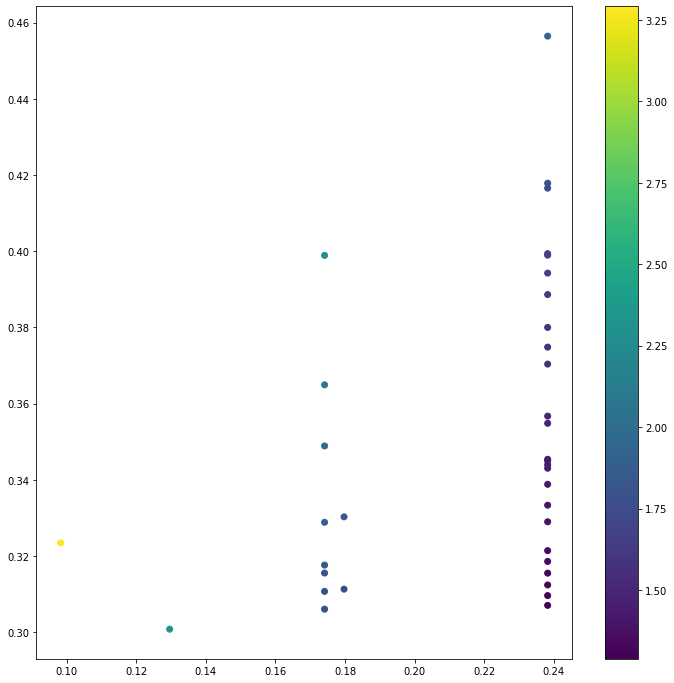

In [11]:
plt.figure(figsize=(12, 12))
cm = plt.cm.get_cmap('Reds')
sc = plt.scatter(rules["consequent support"], rules["confidence"], c=rules["lift"])
plt.colorbar(sc)
plt.show()

In [12]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [13]:
rules = rules[["antecedents", "consequents", "support"]]

In [14]:
rules.sort_values("support", inplace = True, ascending = False)

/Users/franvaquer92/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [15]:
rules_20 = rules.head(20)
rules_20.reset_index(inplace=True, drop = True)
rules_20.drop(range(0,20,2),inplace = True)


/Users/franvaquer92/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
rules_20

antecedents    consequents   support
1           chocolate  mineral water  0.052667
3         ground beef  mineral water  0.040933
5   frozen vegetables  mineral water  0.035733
7             burgers           eggs  0.028800
9           olive oil  mineral water  0.027467
11     low fat yogurt  mineral water  0.023867
13               soup  mineral water  0.023067
15            chicken  mineral water  0.022800
17    frozen smoothie  mineral water  0.020133
19        cooking oil  mineral water  0.020133

In [17]:
labels = pd.DataFrame([np.concatenate([rules_20["antecedents"].unique(), rules_20["consequents"].unique()])]).T
labels.columns = ["Producto"]
labels.drop_duplicates(inplace = True, ignore_index=True)

In [18]:
labels

Producto
0           chocolate
1         ground beef
2   frozen vegetables
3             burgers
4           olive oil
5      low fat yogurt
6                soup
7             chicken
8     frozen smoothie
9         cooking oil
10      mineral water
11               eggs

In [19]:
labels["products_index"] = labels.index

In [20]:
labels

Producto  products_index
0           chocolate               0
1         ground beef               1
2   frozen vegetables               2
3             burgers               3
4           olive oil               4
5      low fat yogurt               5
6                soup               6
7             chicken               7
8     frozen smoothie               8
9         cooking oil               9
10      mineral water              10
11               eggs              11

In [21]:
rules_20 = rules_20.merge(labels, left_on="antecedents", right_on="Producto", how = "left")
rules_20 = rules_20.merge(labels, left_on="consequents", right_on="Producto", how = "left")

In [22]:
rules_20

antecedents    consequents   support         Producto_x  \
0          chocolate  mineral water  0.052667          chocolate   
1        ground beef  mineral water  0.040933        ground beef   
2  frozen vegetables  mineral water  0.035733  frozen vegetables   
3            burgers           eggs  0.028800            burgers   
4          olive oil  mineral water  0.027467          olive oil   
5     low fat yogurt  mineral water  0.023867     low fat yogurt   
6               soup  mineral water  0.023067               soup   
7            chicken  mineral water  0.022800            chicken   
8    frozen smoothie  mineral water  0.020133    frozen smoothie   
9        cooking oil  mineral water  0.020133        cooking oil   

   products_index_x     Producto_y  products_index_y  
0                 0  mineral water                10  
1                 1  mineral water                10  
2                 2  mineral water                10  
3                 3           eggs                11  
4                 4  mineral water                10  
5                 5  mineral water                10  
6                 6  mineral water                10  
7                 7  mineral water                10  
8                 8  mineral water                10  
9                 9  mineral water                10

In [23]:
rules_20.drop(["Producto_x", "Producto_y"], inplace = True, axis = 1)

In [24]:
rules_20

antecedents    consequents   support  products_index_x  \
0          chocolate  mineral water  0.052667                 0   
1        ground beef  mineral water  0.040933                 1   
2  frozen vegetables  mineral water  0.035733                 2   
3            burgers           eggs  0.028800                 3   
4          olive oil  mineral water  0.027467                 4   
5     low fat yogurt  mineral water  0.023867                 5   
6               soup  mineral water  0.023067                 6   
7            chicken  mineral water  0.022800                 7   
8    frozen smoothie  mineral water  0.020133                 8   
9        cooking oil  mineral water  0.020133                 9   

   products_index_y  
0                10  
1                10  
2                10  
3                11  
4                10  
5                10  
6                10  
7                10  
8                10  
9                10

In [25]:
rules_20["rgb"] = ""
for i in range(len(rules_20["products_index_x"])):
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    rules_20["rgb"][i] = f"rgba({r},{g},{b},0.8)"
rules_20

/var/folders/jm/_cqzmbbs0jv4bdms06q4tfdh0000gn/T/ipykernel_56014/1169138535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_20["rgb"][i] = f"rgba({r},{g},{b},0.8)"


antecedents    consequents   support  products_index_x  \
0          chocolate  mineral water  0.052667                 0   
1        ground beef  mineral water  0.040933                 1   
2  frozen vegetables  mineral water  0.035733                 2   
3            burgers           eggs  0.028800                 3   
4          olive oil  mineral water  0.027467                 4   
5     low fat yogurt  mineral water  0.023867                 5   
6               soup  mineral water  0.023067                 6   
7            chicken  mineral water  0.022800                 7   
8    frozen smoothie  mineral water  0.020133                 8   
9        cooking oil  mineral water  0.020133                 9   

   products_index_y                    rgb  
0                10    rgba(113,62,63,0.8)  
1                10     rgba(8,181,18,0.8)  
2                10   rgba(133,199,27,0.8)  
3                11   rgba(101,57,123,0.8)  
4                10  rgba(166,230,121,0.8)  
5                10   rgba(49,166,149,0.8)  
6                10  rgba(249,184,166,0.8)  
7                10   rgba(143,77,214,0.8)  
8                10   rgba(223,206,87,0.8)  
9                10    rgba(131,32,27,0.8)

In [26]:
fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  labels["Producto"],
      color =  rules_20["rgb"]
    ),
    # Add links
    link = dict(
      source =  rules_20["products_index_x"],
      target =  rules_20["products_index_y"],
      value =  rules_20["support"],
      
      color = rules_20["rgb"]
))])

fig.update_layout(title_text="Productos comprados conjuntamente",
                  font_size=12)
fig.show()

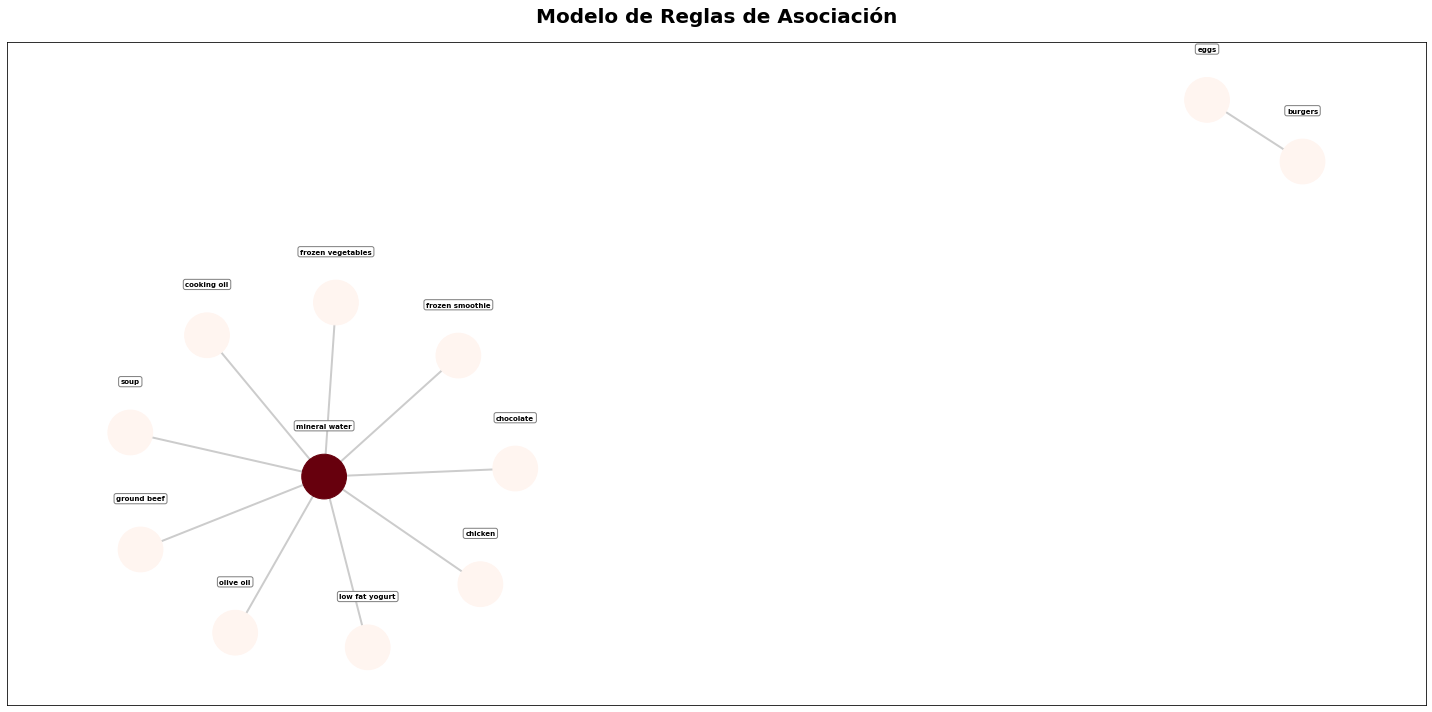

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el grafo
G = nx.from_pandas_edgelist(rules_20, source='antecedents', target='consequents')

# Calcular la centralidad
centrality = nx.betweenness_centrality(G)

# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(20, 10))

# Configurar el layout del grafo
pos = nx.spring_layout(G)

# Configurar los colores de los nodos según su centralidad
node_colors = [centrality[n] for n in G.nodes()]

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_colors, cmap=plt.cm.Reds, ax=ax)

# Dibujar las aristas
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', alpha=0.4, width=2, ax=ax)

# Configurar las etiquetas de los nodos
node_labels = nx.draw_networkx_labels(G, pos, font_size=7, font_family='sans-serif', font_weight='bold', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray"), ax=ax)

# Configurar el título y los ejes del gráfico
ax.set_title("Modelo de Reglas de Asociación", fontsize=20, fontweight='bold', pad=20)
ax.set_xticks([])
ax.set_yticks([])

# Ajustar la posición de las etiquetas
def adjust_label_pos(node_labels, pos):
    for label, (x, y) in pos.items():
        node_labels[label].set_position((x, y+0.07))

adjust_label_pos(node_labels, pos)

# Mostrar el gráfico
plt.tight_layout()
plt.show()